## Bokeh 

---

E testes de interatividade com Widgets

### Widgets

---

Tipos básicos: 

- entrada de texto

- botões

- widgets baseados em entrada

Às vezes é preciso dar o seguinte comando:

    jupyter nbextension enable --py --sys-prefix widgetsnbextension
    
E às vezes reinstalar o pacote:

    conda create -n widgets python=3.6 notebook ipywidgets -y

E mandar reativar:

    conda activate widgets
    jupyter notebook --no-browser

In [12]:
def f(x):
    return x

In [13]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [14]:
import ipywidgets
ipywidgets.IntSlider()

IntSlider(value=0)

In [15]:
from ipywidgets import widgets

In [16]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Os widgets possuem duas partes: [fonte](https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/)

1. The UI/HTML element that renders in the **output cell** (e.g., a textbox)

2. An event handler that lets you specify **what should happen** when the value changes. In most cases, you’ll want to define a Python function that gets called when the user changes the input, so you can update other elements of your notebook (e.g., visualizations) accordingly.

#### Text input

---

Você pode criar um campo de entrada texto usando widgets.Text().
<br>

O .on_submit() observa a atividade e chama ma função para lidar com esta atividade.

In [17]:
from IPython.display import display as dsp
texto = widgets.Text()
dsp(texto)
disabled=False

def submeter_manipulador(emissor):
    print(texto.value)

texto.on_submit(submeter_manipulador)

Text(value='')

ot


#### Botão

---

In [18]:
%matplotlib inline
import ipywidgets as widgets
button = widgets.Button(description='Display Chart')
out = widgets.Output()
def on_button_clicked(b):
    button.description = 'clicked'
    with out:
        print('Ay')

button.on_click(on_button_clicked)
widgets.VBox([button, out])

In [19]:
botao = widgets.Button(description="Aperte-me!")
display(botao)

def botao_clicado(b):
    print("ooooh....")
    
botao.on_click(botao_clicado)

Button(description='Aperte-me!', style=ButtonStyle())

ooooh....


Outra maneira

In [20]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed
from random import choice

def lingua():
    selelingua = ["Inglês", "Fai fong", "Chai fong", "Español", "Italiano", "Alamanho"]
    print (choice(selelingua))
    
lingua()

interact_manual(lingua)

Alamanho


interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

<function __main__.lingua()>

Outras interações... mais [aqui](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html)

In [21]:
def f(x):
    print (x)

#interact(f, x=10)
    
#interact(f, x=True)

interact(f, x="text")

interactive(children=(Text(value='text', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

**Caixas** criadas podem transferir conteúdo de uma para outra

---

In [22]:
TextoSaida = widgets.Text()
TextoSaida

Text(value='')

In [12]:
TextoEntrada = widgets.Text()

def TornaCaixaAlta(enviadopor):
    TextoSaida.value = TextoEntrada.value.upper()
    
TextoEntrada.on_submit(TornaCaixaAlta)

TextoEntrada

Text(value='')

## Visualizações interativas

---

Primeiro uma visualização **comum**

In [23]:
import ipywidgets
ipywidgets.IntSlider()

IntSlider(value=0)

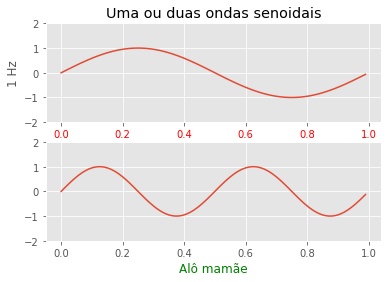

In [24]:
from matplotlib.pyplot import plot, figure, show
from numpy import arange, sin, pi

fig = figure(1)
t = arange(0.0, 1.0, 0.01)

ax1 = fig.add_subplot(211)
ax1.plot(t, sin(2*pi*t))
ax1.grid(True)
ax1.set_ylim((-2, 2))
ax1.set_ylabel('1 Hz')
ax1.set_title('Uma ou duas ondas senoidais')

for label in ax1.get_xticklabels():
    label.set_color('r')

ax2 = fig.add_subplot(212)
ax2.plot(t, sin(2*2*pi*t))
ax2.grid(True)
ax2.set_ylim((-2, 2))
l = ax2.set_xlabel('Alô mamãe')
l.set_color('g')
l.set_fontsize('large')

show()

E agora com o **botão interativo**! Para saber [mais](http://nbviewer.jupyter.org/github/quantopian/ipython/blob/master/examples/Interactive%20Widgets/Index.ipynb/)

---

In [25]:
from ipywidgets import widgets
from ipywidgets import interact, interact_manual, fixed
from numpy import arange, sin, pi
from matplotlib.pyplot import plot, figure, show 

t = arange(0.0, 1.0, 0.01)

def pltsen(f):
    plot(t,sin(2*pi*t*f));
    show()

interact(pltsen, f=(1,10,0.1));

interactive(children=(FloatSlider(value=5.0, description='f', max=10.0, min=1.0), Output()), _dom_classes=('wi…

Não use isso!

In [ ]:
from IPython.html import widgets

(...) isso foi substituído por:

In [9]:
import ipywidgets as widgets

Observe que aqui nós chamamos o **Matplotlib** no modo **Notebook**. Para ele retornar ao nosso modo usual, que é traçando os gráficos dentro do próprio Jupyter Notebook em sem bordas ou botões de comando, devemos escrever:

    %matplotlip inline

Text(value='', description='Domain to ping')

<IPython.core.display.Javascript object>


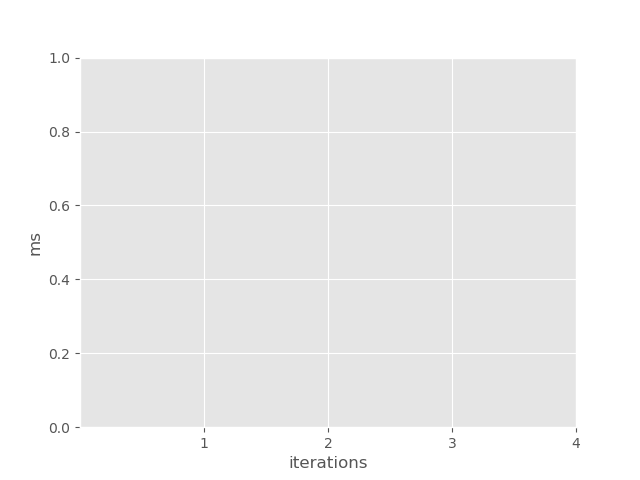

HBox()

Domain gave error on pinging
Domain gave error on pinging


In [10]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4
 
# displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)
display(text)

# preparing the plot
data = pd.DataFrame()
x = range(1,NUMBER_OF_PINGS+1)
plots = dict()
fig, ax = plt.subplots()
plt.xlabel('iterations')
plt.ylabel('ms')
plt.xticks(x)
plt.show()

# preparing a container to put in created checkbox per domain
checkboxes = []
cb_container = widgets.HBox()
display(cb_container)

# add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")

# function to deal with the added domain name
def handle_submit(sender):
    # a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print ("Domain gave error on pinging")
    else:
         # rebuild plot based on ping result
        data = hits
        data = data.astype(float)
        plots, = ax.plot(x, data, label=text.value)
        plt.legend()
        plt.draw()
        # add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)
    
# function to deal with the checkbox update button      
def on_button_clicked(b):
    for c in cb_container.children:
        if not c.value:
            plots.set_visible(False)
        else:
            plots.set_visible(True)
    plt.legend()
    plt.draw()

button.on_click(on_button_clicked)
text.on_submit(handle_submit)
plt.show()

## Dicas para Bokeh [aqui](https://www.youtube.com/watch?v=9FlUFLmaWvY&t=2772s)

---

    conda install -c bokeh/channel/dev bokeh
    
*Observação: como o Bokeh é uma implementação Java, daqui para frente se você quiser visualizar gráficos vai ter que ativar cada uma das caixinhas de código. Elas não deixam o resultado permanente, como nas outras implementações*

In [26]:
import bokeh

In [27]:
bokeh.__version__

'1.0.0dev8'

Instalar databases demonstrativos

    conda install -c bokeh/channel/dev bokeh

In [28]:
import pandas as pd

In [29]:
fonte='C:/pyprog/gapminder.csv'
data = pd.read_csv(fonte, index_col='Year', thousands=r',')
print(data.dtypes)
data.head()

Country        object
life          float64
population    float64
income        float64
region         object
dtype: object


,Country,life,population,income,region
Year,,,,,
1800,Afghanistan,28.211000,3280000.0,603.0,South Asia
1801,Afghanistan,28.200753,NaN,603.0,South Asia
1802,Afghanistan,28.190507,NaN,603.0,South Asia
1803,Afghanistan,28.180260,NaN,603.0,South Asia
1804,Afghanistan,28.170013,NaN,603.0,South Asia


In [30]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [31]:
from bokeh.io import show
from bokeh.plotting import figure

Para deixar as legendas do eixo X bonitinhas:

*Observação: até o momento o Bokeh trabalha com fontes de dados na forma de **Listas**. Implementações mais elaboradas ainda não são suportadas. Isso não chega a ser um grande problema, pois os dados são facilmente tratados pelo Pandas*

In [32]:
from bokeh.models import NumeralTickFormatter

p= figure(height=200, tools='')
p.circle (x=data.loc[2010].income, y=data.loc[2010].life, color='brown') #p.line, p.cross ...
p.xaxis[0].formatter = NumeralTickFormatter(format='$0,')

show(p)

A fonte (source) aceita um Dataframe ou um Dicionário. No caso foi passado um **Dicionário**

E **Hover** possibilita abrir os **Tooltips** com os  nomes dos países:

In [33]:
# aceita dicionário ou dataframe
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool

source = ColumnDataSource(dict(x=data.loc[2010].income,
                               y=data.loc[2010].life,
                               country=data.loc[2010].Country))

hover = HoverTool(tooltips='@country', show_arrow=False)
                                          
PLOT_OPTS = dict(height=200, x_axis_type='log', x_range=(100, 100000), y_range=(0,100))
p=figure(tools=[hover], **PLOT_OPTS)

p.circle(x='x', y='y', source=source, color='brown')

show(p)

In [34]:
source.column_names

['x', 'y', 'country']

In [35]:
source.data

{'x': Year
 2010     1637.0
 2010     9374.0
 2010    12494.0
 2010    38982.0
 2010     7047.0
 2010    20567.0
 2010    15765.0
 2010     6508.0
 2010    41330.0
 2010    42861.0
 2010    15950.0
 2010    22915.0
 2010    40553.0
 2010     2459.0
 2010    15297.0
 2010    15703.0
 2010    40764.0
 2010     8209.0
 2010     1637.0
 2010     6516.0
 2010     5279.0
 2010     9145.0
 2010    13642.0
 2010    14660.0
 2010    70636.0
 2010    14886.0
 2010     1431.0
 2010      725.0
 2010     2513.0
 2010     2571.0
          ...   
 2010     3282.0
 2010    14325.0
 2010     5862.0
 2010    42898.0
 2010    54183.0
 2010     6603.0
 2010    39085.0
 2010     2110.0
 2010     2143.0
 2010    12822.0
 2010     1777.0
 2010     1246.0
 2010     4945.0
 2010    29321.0
 2010    10411.0
 2010    16674.0
 2010    10032.0
 2010     1515.0
 2010     7844.0
 2010    56644.0
 2010    36240.0
 2010    49373.0
 2010    17095.0
 2010     4185.0
 2010     2948.0
 2010    16536.0
 2010     4486.0
 20

In [ ]:
source.data['country']

Criando bolas de tamanhos variados:

In [37]:
from bokeh.models import ColumnDataSource
source = ColumnDataSource(dict(
    x=data.loc[2010].income,
    y=data.loc[2010].life,
    country=data.loc[2010].Country,
    population=data.loc[2010].population,
    region=data.loc[2010].region
))
source.column_names

['x', 'y', 'country', 'population', 'region']

Maneira mais curta de filtrar:

    source = ColumnDataSource(data.loc[2010])
    source.column_names

In [ ]:
source.data['population'].astype(int)

In [39]:
from bokeh.models import LinearInterpolator # um mapper (a população da China é de 1 bi!)
from bokeh.models import HoverTool

size_mapper = LinearInterpolator(
        x=[data.population.dropna().min().astype(int), data.population.dropna().max().astype(int)],
        y=[5, 50]) # o tamanho que eu quero das bolas, entre 5 e 50

PLOT_OPTS = dict(height=200, x_axis_type='log', x_range=(100, 100000), y_range=(0,100))
p = figure(
        title=str(2010),
        toolbar_location='above',
        tools=[HoverTool(tooltips='@country', show_arrow=False)], **PLOT_OPTS)

p.circle (
        x='x', y='y',
        size={'field': 'population', 'transform': size_mapper},
        alpha=0.6,
        source=source)
show(p)

Evidentemente eu não vou traçar um único **círculo**

Então o meu desenhador, para cada atributo, tem três possibilidades:

- atributo **fixo**: com a propriedade já definida (ex: size=20), irá iterar no campo do atributo **source** até traçar todos os círculos e esgotar todos os ítens da **lista**

- atributo **lista**: ao iterar no campo do atributo **source**, irá para cada círculo, puxar um valor da **lista** atribuída àquela propriedade e irá traçar cada círculo com o parâmetro lá existente (normalmente esta lista é uma das colunas do meu dataframe!)

- atributo **dicionário**: parecido com o de cima, com a modificação de que o dado da coluna do meu dataframe que eu quero que aja sobre um dos atributos do círculo possui um formato inadequado. Então eu passo um dicionário contendo a lista **original** e uma lista **transformada** do mesmo tamanho

O que foi usado para traçar o tamanho dos círculos do exemplo acima:

In [40]:
populacao = [10000, 231, 331, 100000]
mapatamanho = [5, 2, 3, 50]

size={'field': populacao, 'transform': mapatamanho}
size

{'field': [10000, 231, 331, 100000], 'transform': [5, 2, 3, 50]}

Observe que o mapeamento não necessariamente é feito multiplicando valores para ter um melhor ajuste. Eu poderia ter, se quisesse representar isso na feição **color**:

    'transform': ['orange', 'blue', 'blue', 'red']
    
E agora a função **map**. Ela é muito útil no Pandas, mas o que ela representa?

Ela veio da **Matemática**, mais especificamente de coisas que lidam com **conjuntos**. Então suponha que eu tenha um mapa em papel, desses que os escoteiros usam para encontrar suas trilhas na mata. E agora eu quero criar um modelo 3D (poderia ser o contrário!), partindo de informações daquele mapa. Eu tenho **curvas de nível**, que me dão indicações da altitude de cada ponto (eu preciso interpolar a distância entre cada curva para achar a altura de cada ponto!). E eu tenho **coordenadas** X e Y. Bom, nada me impede de partir do R2 -> R3 e uma vez no R3, mandar traçar tudo o que eu obtive daquele meu velho mapa em 3D. E quem faz a passagem do R2 para o R3? Uma **função matemática**, uma função específica de **mapeamento**:

![Figura: função de mapeamento](mapeamento_funcao.png)

E essa função ficou mais ou menos assim:

    mapatamanho = FuncaoDeMapeamento(
                   x=[MenorParametroOriginal, MaiorParametroOriginal],
                   y=[MenorParametroTransformado, MaiorParametroTransformado])
                   
No caso a **Função de Mapeamento** foi um **Interpolador Linear**. Ele parte do **menor** e do **maior** valor do grupo de dados e traça uma linha virtual entre os dois. Sabendo o quanto um determinado valor intermediário está afastado do **menor** valor, lhe dá o quanto ele deve ser **ajustado** para caber no novo conjunto. E as medidas do **menor** e do **maior** valor do conjunto transformado também são definidas por nós

Mas **nem sempre o mundo é linear**! Ora, se eu tenho a intuição da curva que melhor representa minha transformação, eu posso definí-la no Python, ou usar uma biblioteca pronta de **aproximação** ou **interpolação**, conforme o caso. Caso tenha dúvidas sobre essas coisas de **Geometria**, recomendo que faça uma revisão em um livro clássico da área

E outras funções? Bom, se eu fosse tornar os parâmetros dessa minha coluna em **cores** por exemplo, bastaria encontrar uma função de mapeamento adequada, que **fatiasse** os dados da minha coluna em 5 ou 10 subgrupos e atribuísse uma palheta de degradês. Parece complicado? Sim, parece. Mas na verdade, é muito **simples** fazer isso. E precisa de muita codificação? Não. Normalmente uma **única linha de código** basta!

---

Curiosidade sobre **mensagens de erro**. Sempre ao **final** há uma mensagem significativa do que ocorreu e sugestões de como reparar. Uma das coisas que você pode fazer em Python é **induzir** um erro para observar as sugestões dadas pelo interpretador. É uma maneira rápida de consultar um **help**. Assim:

    p.circle (
        x='x', y='y',
        size={'field': 'population', 'transform': size_mapper},
        alpha=0.6,
        source=source, dddd='')
        
Me dá um erro **sugestivo**, passando **todos** os atributos do objeto **Círculo**:

    AttributeError: unexpected attribute 'dddd' to Circle

E agora a parte boa:

    possible attributes are

    angle, angle_units, fill_alpha, fill_color, js_event_callbacks, js_property_callbacks, line_alpha, line_cap, line_color, line_dash, line_dash_offset, line_join, line_width, name, radius, radius_dimension, radius_units, size, subscribed_events, tags, x or y

Pronto! Um **help** instantâneo usando o erro!

---

Próxima etapa é colorir países por **continente**. Essas feições atribuem novas **dimensões** ao meu gráfico, sem que eu tenha que adicionar mais dimensões de espaço!

In [50]:
from bokeh.models import LinearInterpolator
from bokeh.models import HoverTool
from bokeh.models import CategoricalColorMapper
from bokeh.palettes import Spectral6

size_mapper = LinearInterpolator(
        x=[data.population.dropna().min().astype(int), data.population.dropna().max().astype(int)],
        y=[5, 50])

color_mapper = CategoricalColorMapper(
        factors=list(data.region.unique()),
        palette=Spectral6)

PLOT_OPTS = dict(height=200, x_axis_type='log', x_range=(100, 100000), y_range=(0,100))
p = figure(
        title=str(2010),
        toolbar_location='above',
        tools=[HoverTool(tooltips='@country', show_arrow=False)], **PLOT_OPTS)

p.circle (
        x='x', y='y',
        size={'field': 'population', 'transform': size_mapper},
        color={'field': 'region', 'transform': color_mapper},
        alpha=0.6,
        legend='region',
        source=source)
p.legend.border_line_color=None # para eliminar a borda da legenda
p.legend.location = (30,-10)
p.right.append(p.legend[0])
show(p)

#### Um pequeno truque

---

O Bokeh possui depósitos de objetos acima, abaixo, à esquerda e à direita do gráfico. Então basta eu apensar um dos meus objetos para o depósito:

    p.right.append(p.legend[0])
    
E se eu consultar, meu objeto **legenda** agora se localiza lá e não mais sobre o gráfico:

In [51]:
p.right

[Legend(id='9f89afbc-be36-482d-bd78-668a25889769', ...)]

Feito isso, eu posso dar um **ajuste fino** no local das legendas:
    
    p.legend.location = (20,-10)

#### Uso funções do Pandas

---

Posso testar elas numa pequena célula antes para fazer as coisas para mim

Aqui eu encontrei todas as **categorias** necessárias para meu mapeamento por cores:

In [42]:
list(data.region.unique())

['South Asia',
 'Europe & Central Asia',
 'Middle East & North Africa',
 'Sub-Saharan Africa',
 'America',
 'East Asia & Pacific']

#### Escolha entre palhetas de cores

---

Basicamente há duas famílias de palhetas:
    
- cores que **combinam**

- cores que **contrastam**

No caso, cores que contrastam fica melhor, já que o objetivo é **diferenciar**. Uma classe, como Spectra possui vários subgrupos. Como eu descobri que tenho apenas **seis** regiões, a escolha natural foi Spectral6!

In [43]:
from bokeh.palettes import Spectral6
Spectral6

['#3288bd', '#99d594', '#e6f598', '#fee08b', '#fc8d59', '#d53e4f']

Mas eu posso fazer um mapeamento de cores que **combinam** em outro campo, por exemplo população

---

Apenas o **Sumário** aqui (não rode!):

In [ ]:
from bokeh.models import LinearColorMapper
from bokeh.palettes import Viridis256

color_mapper = LinearColorMapper(palette=Viridis256, 
                                low=data.population.min(), high=data.population.max())

p.circle( ...
        color={'field':'pop', 'transform':color_mapper}
         
p.add_layout(ColorBar(color_mapper=color_mapper, location=(0,0), 
                                orientation='horizontal'), 'below')

**Implementando**, eu tenho algo legal com cores **contínuas**:

In [47]:
from bokeh.models import LinearInterpolator
from bokeh.models import LinearColorMapper
from bokeh.models import HoverTool
from bokeh.models import CategoricalColorMapper
from bokeh.models import ColorBar
from bokeh.palettes import Viridis256

size_mapper = LinearInterpolator(
        x=[data.population.dropna().min().astype(int), data.population.dropna().max().astype(int)],
        y=[5, 50])

color_mapper = LinearColorMapper(palette=Viridis256, 
                                low=data.population.min(), high=data.population.max())


PLOT_OPTS = dict(height=300, x_axis_type='log', x_range=(100, 100000), y_range=(0,100))
p = figure(
        title=str(2010),
        toolbar_location='above',
        tools=[HoverTool(tooltips='@country', show_arrow=False)], **PLOT_OPTS)

p.circle (
        x='x', y='y',
        size={'field': 'population', 'transform': size_mapper},
        color={'field': 'population', 'transform': color_mapper},
        alpha=0.6,
        source=source)
p.add_layout(ColorBar(color_mapper=color_mapper, location=(0,0), 
                                orientation='horizontal'), 'below')

show(p)

### Um truque de condensação de código

---

Existe uma regra básica em programação que é **DRY** (don´t repeat yourself). Então se eu vou plotar uma série de gráficos, eu crio um parâmetro meio universal para ser aproveitado em todos eles:

    PLOT_OPTS = dict(height=300, x_axis_type='log', x_range=(100, 100000), y_range=(0,100))
    
Eu coloco essas coisas numa célula inicial e simplesmente chamo o que é universal em cada gráfico, mudando o resto

Aqui eu vou repetindo o **PLOT_OPTS**. Por que?

É que isso aqui é uma série de testes. Então às vezes eu preciso cortar coisas, mudar a ordem...

Existem **duas** etapas em qualquer processo de invenção:

- A primeira delas é o laboratório de Flemming. Em ciência, existem cientistas extremamente **caóticos** e **criativos**. Dizem que Flemming, um pouco como Nikola Tesla, foi um pouco tipo **cientista louco**. Então o que ele tinha era um laboratório de invenções. Coisas fermentavam, outras apodreciam, enquanto experimentos se localizavam em outro lugar. A invenção da **penicilina** foi acidental? Não exatamente! É que nesse laboratório tipo a sala de invenções de **Willy Wonka**, em uma das placas de culturas de **bactérias**, o cientista observou que às bordas de onde um **fungo** acidentalmente se desenvolveu, a bactéria não vingou. Ele observou aquilo e **hmmmm, nesse mato tem coelho...** e investigando em detalhes descobriu que o fungo secretava uma substância que inibia o crescimento das bactérias! Resultado: a invenção do século. E se o seu laboratório fosse totalmente **limpo** e **estéril**? Provavelmente nada disso teria acontecido. Cientistas assim são altamente necessários em ciência nos **processos iniciais** de entendimento, apropriação e criação de novos métodos e conhecimentos, da qual a ciência depende

- e a segunda é o laboratóro de Lavoisier. Assim como Pasteur, existem cientistas extremamente **metódicos** e **organizados**. 

### Gráfico interativo no Bokeh usando Ipywidgets

---

*Observação: às vezes os Widgets estão desabilitados no Jupyter Notebook*

    jupyter nbextension enable --py --sys-prefix widgetsnbextension

Apenas o **sumário** aqui (não rode!):

In [ ]:
from ipywidgets import interact
from bokeh.io import push_notebook

def update(year): 
    new_data = dict(x=data.loc[year].income,
                    y=data.loc[year].life,
                    country=data.loc[year].Country,
                    region=data.loc[year].region,
                    population=data.loc[year].population)
    source.data = new_data
    #p.title.textbook = str(year)
    push_notebook()

interact(update, year=(1800, 2014, 1), auto_display=True)

Interação completa:

In [59]:
from bokeh.models import LinearInterpolator
from bokeh.models import CategoricalColorMapper
from bokeh.palettes import Spectral6
from ipywidgets import interact
from bokeh.io import push_notebook

def update(year): 
    new_data = dict(x=data.loc[year].income,
                    y=data.loc[year].life,
                    country=data.loc[year].Country,
                    region=data.loc[year].region,
                    population=data.loc[year].population)
    source.data = new_data
    #p.title.textbook = str(year)
    push_notebook()# <--isso modifica o notebook

size_mapper = LinearInterpolator(
        x=[data.population.dropna().min().astype(int), data.population.dropna().max().astype(int)],
        y=[5, 50])

color_mapper = CategoricalColorMapper(
        factors=list(data.region.unique()),
        palette=Spectral6)

PLOT_OPTS = dict(height=200, x_axis_type='log', x_range=(100, 100000), y_range=(0,100))
p = figure(
        title=str(2010),
        toolbar_location='above',
        tools=[HoverTool(tooltips='@country', show_arrow=False)], **PLOT_OPTS)

p.circle (
        x='x', y='y',
        size={'field': 'population', 'transform': size_mapper},
        color={'field': 'region', 'transform': color_mapper},
        alpha=0.6,
        legend='region',
        source=source)
p.legend.border_line_color=None
p.legend.location = (10,-10)
p.right.append(p.legend[0])

show(p, notebook_handle=True);

In [58]:
interact(update, year=(1800, 2014, 1));

interactive(children=(IntSlider(value=1907, description='year', max=2014, min=1800), Output()), _dom_classes=(…

### Bokeh Server

---

    from bokeh.io import curdoc

    curdoc().add)root(p)
    
---
    
    from bokeh.models import Slider
    
    def update(attr, old, new)
        
    
    slider = Slider (start=1800, end=2010, step=1, title=Year)
    slider.on_change('value', update)
    
    from bokeh.layouts import column
    
    layout = column(p, slider)
    
    curdoc().add_root(layout)
    

## Bokeh Widgets [aqui](https://www.youtube.com/watch?v=GkysOB8_xsE)

---

Continuum Analytics